In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


In [ ]:
train_data1=pd.read_csv('/content/drive/MyDrive/income2023f/train_final.csv')
test_data=pd.read_csv('/content/drive/MyDrive/income2023f/test_final.csv')

In [ ]:
test_data['income>50K']=-999

In [ ]:
test_data = test_data.drop(columns=['ID'])

In [ ]:
total=pd.concat([train_data1, test_data])

In [ ]:
total

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23837,26,Private,43408,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,-999
23838,27,Private,116372,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,-999
23839,67,Self-emp-inc,182581,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,20,United-States,-999
23840,46,Local-gov,274689,Assoc-acdm,12,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,-999


In [ ]:
for j in list(total):
  a=total[j].unique()
  check=[]
  for i in a:
    g=total.loc[total[j]==i].count()[0]
    check.append(g)
  order=np.argsort(check)
  total.loc[total[j]=='?',[j]]=a[order][-1]

In [ ]:
total.select_dtypes(include=['object']).columns.tolist()

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [ ]:
word_cols = total.select_dtypes(include=['object']).columns.tolist()
for i in word_cols:
  val_col=total[i].unique()
  n=0
  for j in val_col:
    n=n+1
    total[i]=total[i].replace(j,n)

In [ ]:
total.to_csv('totaldata.csv')
!cp totaldata.csv "/content/drive/MyDrive/income2023f/"

In [ ]:
train_datam=total[total['income>50K']!=-999]

In [ ]:
test_datam=total[total['income>50K']==-999]

In [ ]:
train_datam.loc[train_datam['income>50K']==0,['income>50K']]=-1

<ipython-input-157-e18bb45f33c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_datam.loc[train_datam['income>50K']==0,['income>50K']]=-1


In [ ]:
train_datam

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,1,93449,1,15,1,1,1,1,1,0,0,40,1,1
1,33,1,123424,2,13,1,2,1,2,1,0,0,40,2,1
2,47,2,144844,3,9,1,3,1,2,1,0,0,40,2,-1
3,40,2,114580,3,9,2,3,2,2,2,0,0,40,3,-1
4,39,2,115618,3,9,1,4,1,2,1,0,0,50,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,2,83451,3,9,3,7,4,2,2,0,0,25,2,-1
24996,64,4,202738,3,9,1,7,6,2,2,0,0,35,2,-1
24997,39,2,225544,5,14,1,4,1,2,1,0,0,40,24,-1
24998,53,2,346871,3,9,2,1,4,2,1,4787,0,46,2,1


In [ ]:
train_data=train_datam.iloc[:20000]
test_data=train_datam.iloc[20000:]
test_data=test_data.reset_index(drop=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def buildtree(train_data):
  clf = DecisionTreeClassifier(criterion="gini",max_depth=5000000000)
  clf = clf.fit(train_data.iloc[:,:-1],train_data.iloc[:,-1])
  return clf

In [ ]:
def pred(tree,instance):
  y_pred = tree.predict(instance.iloc[:,:-1])
  return y_pred

result = predict(tree, test_data_m.loc[index:index])


y_pred = tree.predict(instance.iloc[:,:-2])#,check_input=False)
  return y_pred


clf = DecisionTreeClassifier(criterion="entropy",max_depth=depth)
  clf = clf.fit(train_data.iloc[:,:-2],train_data.iloc[:,-2:-1])

from sklearn.tree import DecisionTreeClassifier


resbag=[]
  for j in range(0,500):
    resbag.append(predict(bags[i][j],test_data))

In [ ]:
test_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,2,220640,2,13,2,1,2,4,2,0,0,20,2,-1
1,65,5,172684,2,13,1,2,1,2,1,0,0,44,5,1
2,33,2,195488,3,9,1,7,6,2,2,0,0,52,2,-1
3,39,1,34066,6,10,1,3,1,5,1,0,0,50,2,1
4,28,3,183151,10,12,1,7,1,2,1,0,0,60,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18,2,83451,3,9,3,7,4,2,2,0,0,25,2,-1
4996,64,4,202738,3,9,1,7,6,2,2,0,0,35,2,-1
4997,39,2,225544,5,14,1,4,1,2,1,0,0,40,24,-1
4998,53,2,346871,3,9,2,1,4,2,1,4787,0,46,2,1


In [ ]:
def evaluate_adaboost(tree,alp,test_data_m,currentada):
  correct_preditct = 0
  wrong_preditct = 0
  # for index, row in test_data_m.iterrows():
    #for t,a in zip(alltrees,alps):
  result=pred(tree,test_data_m)
    #print(currentada[index],"init")
    # currentada[index]+=alp*result
    #print(currentada[index],"final")
    #ress+=(result*a)
  currentada=[x+f for x,f in zip(currentada,result)]
  f_result=[1 if x > 0 else -1 for x in currentada]
  #print(currentada)
  try:
    g=test_data_m['income>50K'].tolist()
    f_res=[f*h for f, h in zip(f_result, g)]
    f_res=[1 if x==-1 else 0 for x in f_res]

    wrong_preditct =sum(f_res)

    error = wrong_preditct / len(f_res)
  except:
    error=999
  return f_result,error, currentada

In [ ]:
def baggingdecisiontree(train_data,test_data,subdatasz,rep,T):
  resultstr=[]
  resultste=[]
  iter=[]
  trees=[]
  currentadatr=np.zeros(len(train_data))
  currentadate=np.zeros(len(test_data))
  for i in range(1,T+1):
    iter.append(i)
    subset = train_data.sample(n=subdatasz, replace=rep)
    t=buildtree(subset)
    trees.append(t)
    #print(i)
  # return resultstr
    _,adatr,currentadatr=evaluate_adaboost(t,1,train_data,currentadatr)
    _,adate,currentadate=evaluate_adaboost(t,1,test_data,currentadate)
    resultstr.append(adatr)
    resultste.append(adate)
    print(i,adatr,adate)
  plt.plot(iter, resultstr, label='Train Error', linestyle='-')
  plt.plot(iter, resultste, label='Test Error', linestyle='-')
  plt.xlabel('Number of Iterations')
  plt.ylabel('Error')
  plt.title('Bagging')
  plt.legend()
  plt.show()
  return trees

1 0.11725 0.1914
2 0.1067 0.1656
3 0.0808 0.1656
4 0.08255 0.151
5 0.06725 0.1546
6 0.07 0.151
7 0.05825 0.1532
8 0.0611 0.1494
9 0.0523 0.1498
10 0.0553 0.1444
11 0.04775 0.1464
12 0.05125 0.143
13 0.0438 0.1468
14 0.0471 0.1426
15 0.0424 0.141
16 0.04615 0.1394
17 0.0411 0.1426
18 0.0447 0.1398
19 0.0396 0.1438
20 0.04335 0.1388
21 0.0392 0.1386
22 0.04295 0.138
23 0.03775 0.139
24 0.0408 0.1376
25 0.03675 0.1366
26 0.03945 0.1352
27 0.03605 0.1362
28 0.03845 0.135
29 0.03445 0.135
30 0.03825 0.135
31 0.0351 0.1342
32 0.0379 0.1356
33 0.0353 0.1372
34 0.0365 0.1382
35 0.03455 0.1384
36 0.03585 0.1372
37 0.0339 0.1388
38 0.03535 0.1376
39 0.0336 0.1368
40 0.0347 0.137
41 0.0325 0.1378
42 0.0341 0.1372
43 0.0315 0.1372
44 0.033 0.1366
45 0.0312 0.1376
46 0.0326 0.136
47 0.03035 0.1348
48 0.0323 0.1342
49 0.03035 0.1348
50 0.03265 0.1366
51 0.0304 0.135
52 0.0325 0.1352
53 0.03015 0.1346
54 0.0319 0.1356
55 0.02995 0.134
56 0.03155 0.1358
57 0.02935 0.1348
58 0.03175 0.1354
59 0.02965 0

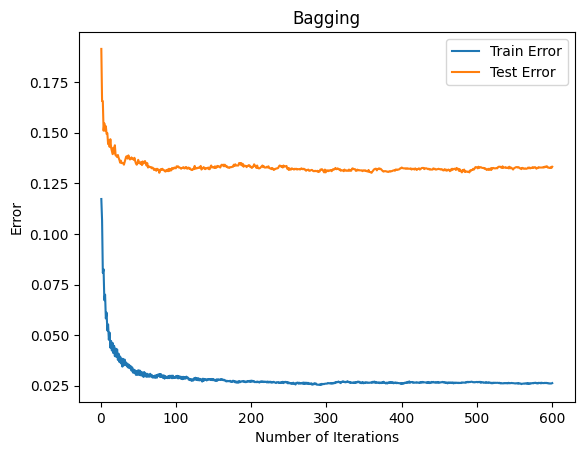

In [ ]:
d=baggingdecisiontree(train_data,test_data,10000,True,600)

In [ ]:
currentadatr=np.zeros(len(test_datam))
for i in d:
  res,_,currentadatr=evaluate_adaboost(i,1,test_datam,currentadatr)

In [ ]:
len(res)

23842

In [ ]:
f_res=[0 if x==-1 else 1 for x in res]

In [ ]:
a=list(range(1,23843))

In [ ]:
import csv

with open('/content/drive/MyDrive/income2023f/bag3.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(a,f_res))

In [ ]:
g=train_data['income>50K'].tolist()
f_res=[f*h for f, h in zip(res, g)]
f_res=[1 if x==-1 else 0 for x in f_res]

wrong_preditct =sum(f_res)

error = wrong_preditct / len(f_res)
print(error)

5e-05
